In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plottoing
import seaborn as sns # data plotting
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [7]:
train_df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [8]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# Exploratory data analysis

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [14]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Plotting Covariance matrix

<AxesSubplot:>

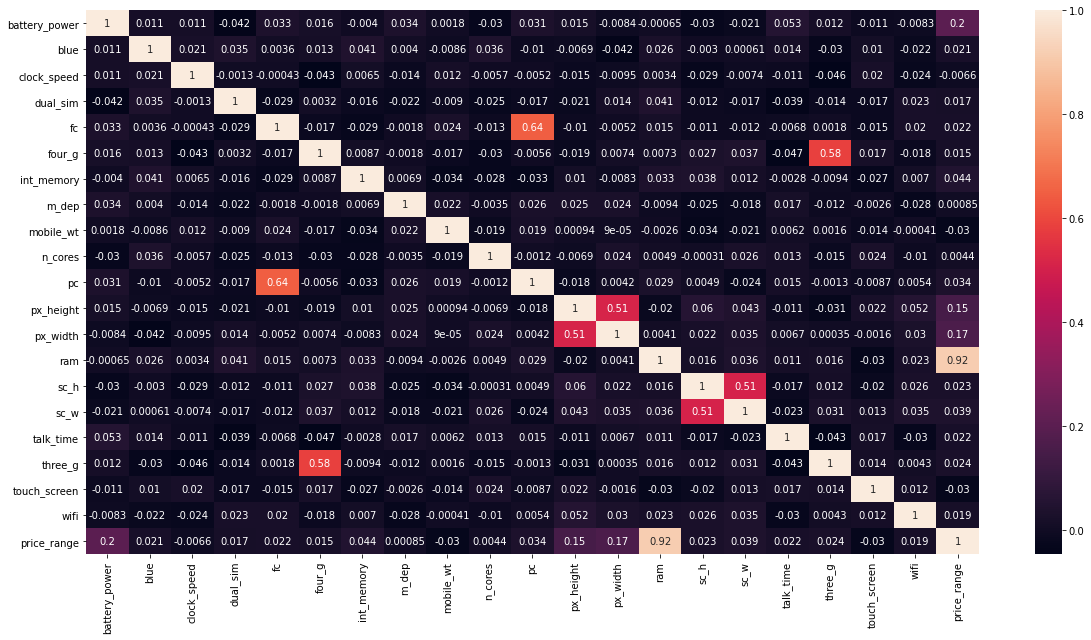

In [27]:
corr = train_df.corr(method='pearson')
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)

## Observation:
* From the above observations we can clearly see that ram has the highest correlation with price range. 

## Ram Vs Price

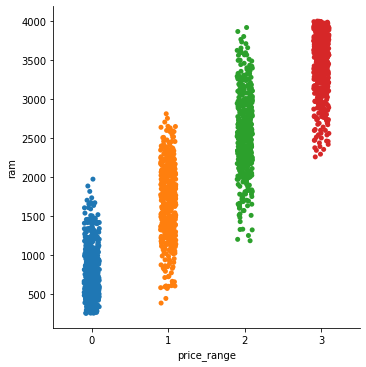

In [29]:
sns.catplot(y='ram', x='price_range', data=train_df);

## Observations:
* As we can see that ram is directly proprtional to price range.
* From the scatter plot we can clearly observe that ram ranging from 500-2000 Mb have a very low price range.
* On the other hand we can see that phones who have ram around 2500-4000 Mb comes from a very high price range.

## Internal memory Vs Price

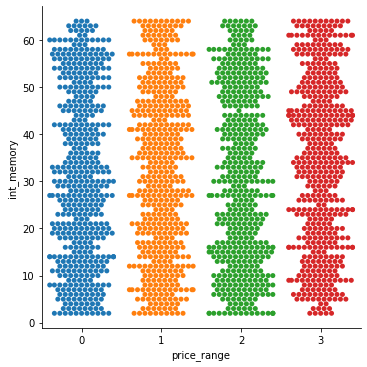

In [46]:
sns.catplot(x='price_range', y='int_memory', kind='swarm', data=train_df);

## 3G Phones Vs Non 3G Phones

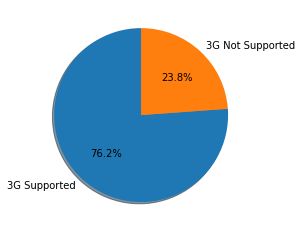

In [47]:
values = train_df['three_g'].value_counts().values
plt.pie(values, labels=['3G Supported', '3G Not Supported'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## 4G Phones Vs Non 4G Phones 

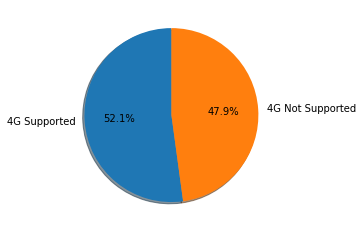

In [53]:
values = train_df['four_g'].value_counts().values
plt.pie(values, labels=['4G Supported', '4G Not Supported'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## Battery power Vs price range

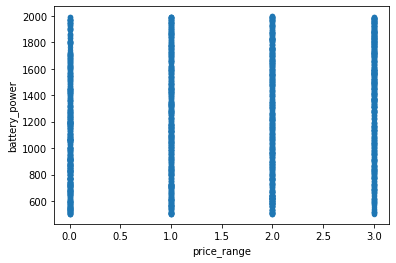

In [63]:
train_df.plot(x='price_range', y='battery_power', kind='scatter');

## Observation:
* From the plot we can see that there is no affect of battery power on the price range.
* We can say that price is independent of battery power.
* This feature is also not contributing to any uniqueness to the data. So, we can also drop this freature.  

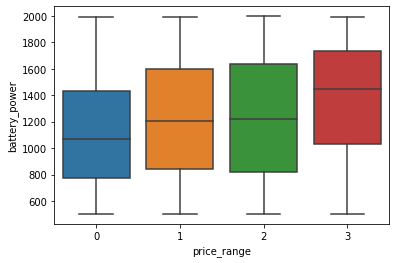

In [57]:
sns.boxplot(x='price_range', y='battery_power', data=train_df);

# Data Pre-processing

## Splitting into dependent features(s) and independet/target feature.

In [66]:
X = train_df.drop('price_range', axis=1)
y = train_df['price_range']

In [67]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [68]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

## Splitting X and y into training and testing data

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

#### Most models like KNN work on Eculidean Distance and hence can be impacted by larger values, So we have to scale data. 

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using Model

## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(f'Accuracy score for KNN using 10 neighbours is {accuracy_score(y_pred, y_test)}')

Accuracy score for KNN using 10 neighbours is 0.5424242424242425


### Using K-fold cross validation to find optimal K

In [91]:
from sklearn.model_selection import cross_val_score
# creating odd neighbors list for K in KNN
neighbors = list(range(1, 40, 2))
# empty list to hold cv score
cv_scores = list()
for k in neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [97]:
mse = np.array([1-x for x in cv_scores])
# determine the best k
optimal_k = neighbors[mse.argmin()]
print(f'The optimal no of neighbors is {optimal_k}')

The optimal no of neighbors is 37


### K value using Elbow plot
Finding k value so that mismatch between actual and predicted values is least.

In [99]:
mismatch = list()
for k in range(1, 40, 2):
    knn_clf = KNeighborsClassifier(n_neighbors= k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    mismatch.append(np.sum(y_pred != y_test))

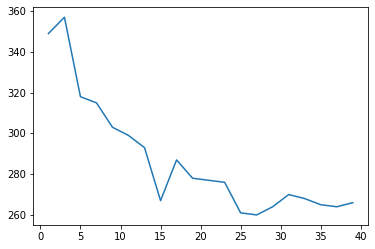

In [103]:
plt.plot(range(1, 40, 2), mismatch)
plt.show();

In [110]:
knn_clf = KNeighborsClassifier(n_neighbors=optimal_k)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(f'KNN with k={optimal_k} accuracy is {accuracy_score(y_pred, y_test)}')

KNN with k=37 accuracy is 0.6


## SVM

### SVM with linear Kernel

In [140]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_hat = svm_linear.predict(X_test)
print(f'SVM with linear kernel accuracy is {accuracy_score(y_hat, y_test)}')

SVM with linear kernel accuracy is 0.9621212121212122


### SVM with RBF(Radial Basis Function) Kernel

In [116]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_hat = svm_rbf.predict(X_test)
print(f'SVM with RBF kernel accuracy is {accuracy_score(y_hat, y_test)}')

SVM with RBF kernel accuracy is 0.8757575757575757


## Naive Bayes Classifier
This Modle is also use for benchmarking of models as it is very simple still very good model.

In [141]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_hat = NB.predict(X_test)
print(f'Gaussian NB gives accuracy of {accuracy_score(y_hat, y_test)}')

Gaussian NB gives accuracy of 0.8045454545454546


## Decision Trees

### Decision Tree With entropy as criteria

In [142]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
d_tree.fit(X_train, y_train)
y_hat = d_tree.predict(X_test)
print(f'Decision tree with criterion as entropy gives accuracy of {accuracy_score(y_hat, y_test)}')

Decision tree with criterion as entropy gives accuracy of 0.8242424242424242


### Decision Tree with gini impurity as criteria

In [143]:
d_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
d_tree.fit(X_train, y_train)
y_hat = d_tree.predict(X_test)
print(f'Decision tree with gini impurity as criteria gives of {accuracy_score(y_hat, y_test)}')

Decision tree with gini impurity as criteria gives of 0.8212121212121212


## Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

# empty list to sotre mean of scores(accuracy) of each randomforest
cv_scores = list()

trees = range(1, 30)
# Using cv to find optimal no of trees in random forest classifier
for n in trees:
    rf_clf = RandomForestClassifier(n_estimators=n, criterion='entropy', random_state=42)
    scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [133]:
# finding miss classification 
mse = np.array([1-x for x in cv_scores])
# determine best n
optimal_n = trees[mse.argmin()]
print(f'The optimal no of trees in random forest is {optimal_n}')

The optimal no of trees in random forest is 23


In [138]:
# Using optimal n to build out RandomForest
rf_clf = RandomForestClassifier(n_estimators=optimal_n)
rf_clf.fit(X_train, y_train)
y_hat = rf_clf.predict(X_test)
print(f'RandomForest with optimal n={optimal_n} gives accuracy of {accuracy_score(y_hat, y_test)}')

RandomForest with optimal n=23 gives accuracy of 0.8666666666666667


# Conclusion: Linear SVM Classifier fits best for this model with 96% Accuracy